# import

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data

In [29]:
amazon= pd.read_csv('/Users/t-2024-m0196/my-repo/Git/Git/실전프로젝트/amazon_이상치처리.csv')

In [30]:
amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
sorted(amazon['DateKey'].unique())

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-29 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-02-04 00:00:00'),
 Timestamp('2017-02-05 00:00:00'),
 Timestamp('2017-02-

In [31]:
# 날짜 필터링 

start_date= '2017-01-01'
end_date= '2018-03-21'

amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
amazon = amazon[(amazon['DateKey'] >=start_date) & (amazon['DateKey'] <= end_date)]
# sorted(amazon['DateKey'].unique())

amazon.info()
amazon.head(3)


<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 27916 to 64222
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Date                      36307 non-null  object        
 4   Invoice Number                    36307 non-null  int64         
 5   Item                              36307 non-null  object        
 6   Line Number                       36307 non-null  int64         
 7   List Price                        36307 non-null  float64       
 8   Order Number                      36307 non-null  int64         
 9   Sales Amount                      36307 non-null  float64       
 10  Sales Amount Based on List Price  36307 non-nul

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
27916,10008602,2018-03-21,439.2400,2018/03/21,226437,Tell Tale Summer Squash,21000,195.0000,320075,535.76,975.0000,372.26,163.50,107.152000,5,103,EA
27917,10008602,2018-03-21,1517.3076,2018/03/21,226437,Nationeel Avocado Dip,13000,842.0244,320075,1850.79,3368.0976,1256.20,594.59,462.697500,4,103,EA
27918,10014779,2018-03-21,192.4900,2018/03/21,226451,Super White Sugar,9000,157.7600,321178,280.79,473.2800,143.73,137.06,93.596667,3,105,SE


In [32]:
temp= amazon['Custkey'].value_counts()
print(len(temp[temp > 1]))
# 34292 개의 Custkey 데이터 중에 중복구매한 사용자 수 482
print(len(temp[temp==1]))
# 1인 사람 41개
print(len(temp))

487
42
529


In [33]:
print(amazon.shape)
amazon.isna().sum()

(36307, 17)


Custkey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [34]:
print('총 매출: ', round(amazon['Sales Amount'].sum(), 2))
print('총 할인 금액: ', round(amazon['Discount Amount'].sum(), 2))
print('총 주문 수: ', round(amazon['Order Number'].sum(), 2))

총 매출:  96803974.11
총 할인 금액:  69436945.25
총 주문 수:  8375355093


# 고객별 Sales Amount

In [35]:
cust_m= amazon.groupby('Custkey')['Sales Amount'].sum().reset_index()

cust_m.sort_values(by= 'Sales Amount', ascending= False)

,Custkey,Sales Amount
343,10021485,10949474.37
432,10025024,7951267.71
443,10025052,5419724.38
440,10025039,3259962.46
489,10025919,3250786.04
...,...,...
491,10026009,224.55
272,10019812,221.04
427,10024924,216.33
169,10013039,216.20


In [36]:
# R, F

cust_rf = amazon.groupby('Custkey').agg(
    Last_Purchase=('Invoice Date', 'max')
    , Frequency=('Order Number', 'nunique') # invoice number?
).reset_index()

cust_rf

,Custkey,Last_Purchase,Frequency
0,10000453,2017/01/06,2
1,10000455,2017/11/04,12
2,10000456,2017/12/04,12
3,10000457,2017/12/01,3
4,10000458,2018/03/06,3
...,...,...,...
524,10027381,2018/03/14,21
525,10027560,2017/12/26,15
526,10027572,2018/03/20,12
527,10027575,2018/03/06,4


# RFM 523개

In [37]:
cust_rfm= cust_rf.merge(cust_m, on= 'Custkey')

cust_rfm= cust_rfm.rename(columns= {'Last_Purchase': 'Recency',
                          'Sales Amount': 'Monetary'})

In [38]:
cust_rfm.info()
cust_rfm.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Custkey    529 non-null    int64  
 1   Recency    529 non-null    object 
 2   Frequency  529 non-null    int64  
 3   Monetary   529 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.7+ KB


,Custkey,Recency,Frequency,Monetary
0,10000453,2017/01/06,2,8422.15
1,10000455,2017/11/04,12,22403.73
2,10000456,2017/12/04,12,104994.68


In [39]:
# sorted(cust_rfm['Recency'].unique())
sorted(cust_rfm['Monetary'].unique())

# 소수점 X
cust_rfm['Monetary']= round(cust_rfm['Monetary'])

# 데이터타입 int로 변경
cust_rfm['Monetary']= cust_rfm['Monetary'].astype(int)

In [40]:
# recency datetime으로 변환
cust_rfm['Recency']= pd.to_datetime(cust_rfm['Recency'])
cust_rfm.info()


# 2018 03 22을 현재날짜로 설정, 가장 최근의 주문 일자를 뺌
cust_rfm['Recency']= dt.datetime(2018, 3, 22) - cust_rfm['Recency']
# 01로 하니까 오류남

# +1
cust_rfm['Recency']= cust_rfm['Recency'].apply(lambda x:x.days+1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Custkey    529 non-null    int64         
 1   Recency    529 non-null    datetime64[ns]
 2   Frequency  529 non-null    int64         
 3   Monetary   529 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 16.7 KB


In [41]:
cust_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,441,2,8422
1,10000455,139,12,22404
2,10000456,109,12,104995
3,10000457,112,3,14285
4,10000458,17,3,4994
...,...,...,...,...
524,10027381,9,21,70995
525,10027560,87,15,48483
526,10027572,3,12,46291
527,10027575,17,4,3549


# CSV 파일 생성

In [42]:
cust_rfm.to_csv('cust_rfm.csv', index= False)

(array([515.,   7.,   4.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([2.0800000e+02, 1.0951346e+06, 2.1900612e+06, 3.2849878e+06,
        4.3799144e+06, 5.4748410e+06, 6.5697676e+06, 7.6646942e+06,
        8.7596208e+06, 9.8545474e+06, 1.0949474e+07]),
 <BarContainer object of 10 artists>)

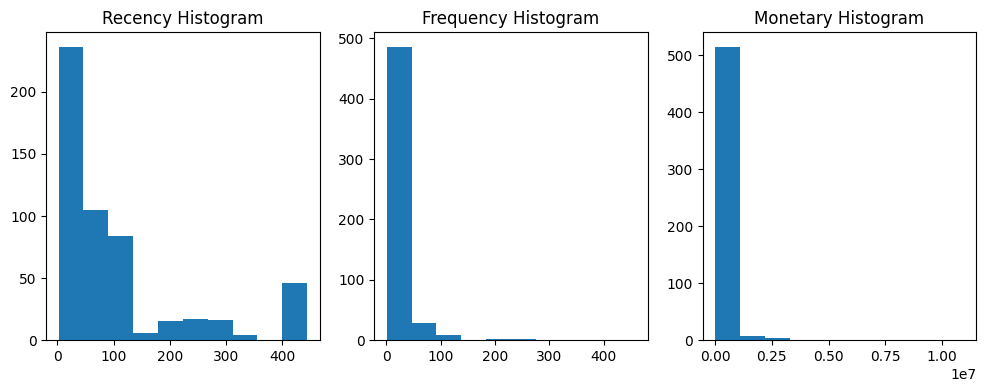

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

# plt.ticklabel_format(style = 'plain')
ax1.set_title('Recency Histogram')
ax1.hist(cust_rfm['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_rfm['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_rfm['Monetary'])

# 모두 왜곡된 값 분포

-- 스케일링

In [44]:
cust_rfm.describe()

,Custkey,Recency,Frequency,Monetary
count,5.290000e+02,529.000000,529.000000,5.290000e+02
mean,1.001696e+07,103.143667,18.020794,1.829943e+05
std,7.739451e+03,126.454426,33.782470,7.114890e+05
min,1.000045e+07,2.000000,1.000000,2.080000e+02
25%,1.001097e+07,13.000000,3.000000,6.365000e+03
50%,1.001941e+07,66.000000,8.000000,2.841000e+04
75%,1.002372e+07,112.000000,20.000000,1.117600e+05
max,1.002758e+07,444.000000,458.000000,1.094947e+07


- recency
    - 마지막 구매일이 최근(2018 03 01)인 사람들이 많음.
- frequency
    - 최대값은 458이지만 중위값은 8.
    - 5분기 동안 8번 구매?
    - 식료품치고는 충성고객이 별로 없다
- monetary
    - 이에 따라 지출금액이 평균 17만 6257, 중위값이 2만 6753
    - (비교적) 많이 쓰는 사람은 엄청 많이 쓰고 적게 쓰는 사람이 대다수.

클러스터링


In [45]:
# 각 구간을 3개로 나눠서 점수 부여... qcut: 'high', 'medium', 'low' 등 카테고리형 데이터
# cut: 동일 길이, qcut: 동일 개수
# recency: 작을수록 최신, 높은 점수
# frequency: 높을수록 높은 점수
# montary: 클수록 높은 점수

cust_rfm['Recency_score'] = pd.qcut(cust_rfm['Recency'], 3, labels=[3, 2, 1])
cust_rfm['Frequency_score'] = pd.qcut(cust_rfm['Frequency'], 3, labels=[1, 2, 3])
cust_rfm['Monetary_score'] = pd.qcut(cust_rfm['Monetary'], 3, labels=[1, 2, 3])

# 각 구간별 경계값
print("Recency 구간 경계값:", pd.qcut(cust_rfm['Recency'], 3).cat.categories)
print("Frequency 구간 경계값:", pd.qcut(cust_rfm['Frequency'], 3).cat.categories)
print("Monetary 구간 경계값:", pd.qcut(cust_rfm['Monetary'], 3).cat.categories)

Recency 구간 경계값: IntervalIndex([(1.999, 20.0], (20.0, 95.0], (95.0, 444.0]], dtype='interval[float64, right]')
Frequency 구간 경계값: IntervalIndex([(0.999, 4.0], (4.0, 15.0], (15.0, 458.0]], dtype='interval[float64, right]')
Monetary 구간 경계값: IntervalIndex([(207.999, 10774.0], (10774.0, 65977.0], (65977.0, 10949474.0]], dtype='interval[float64, right]')


- qcut 빈도대로 3등분: 임의적, 근거 부족

--> 군집화 진행하는 게.

In [46]:
# RFM 점수 계산

cust_rfm['RFM_score'] = cust_rfm['Recency_score'].astype(int) + cust_rfm['Frequency_score'].astype(int) + cust_rfm['Monetary_score'].astype(int)
# int타입으로 변환하지 않으면 오류남. qcut:카테고리형 데이터이기 때문에

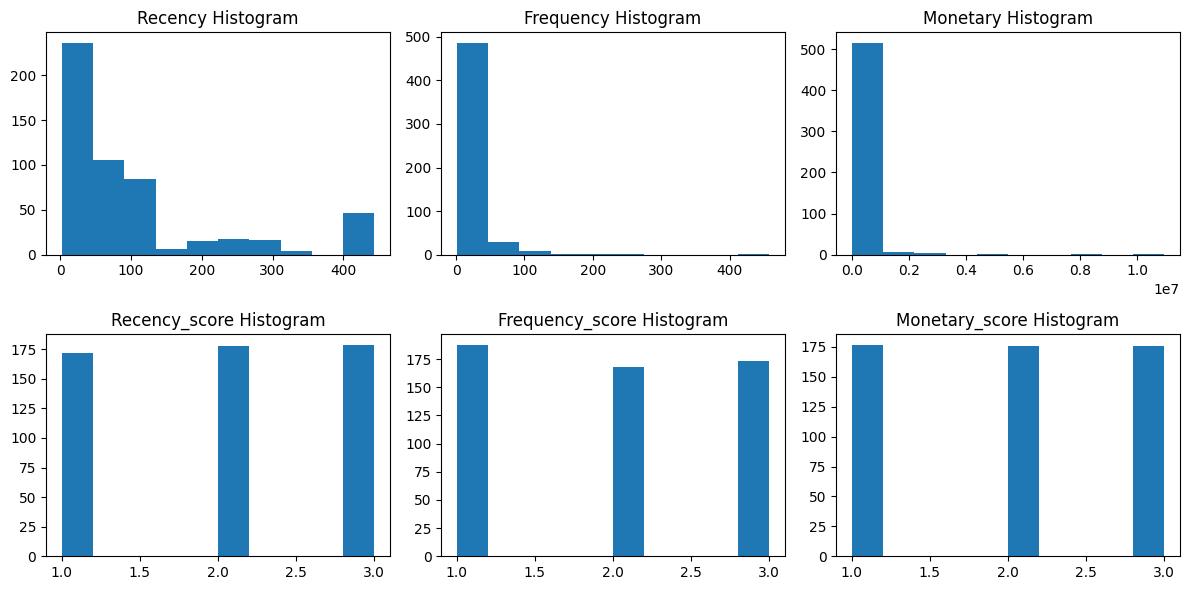

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

axs[0, 0].set_title('Recency Histogram')
axs[0, 0].hist(cust_rfm['Recency'])

axs[0, 1].set_title('Frequency Histogram')
axs[0, 1].hist(cust_rfm['Frequency'])

axs[0, 2].set_title('Monetary Histogram')
axs[0, 2].hist(cust_rfm['Monetary'])

axs[1, 0].set_title('Recency_score Histogram')
axs[1, 0].hist(cust_rfm['Recency_score'].astype(int))

axs[1, 1].set_title('Frequency_score Histogram')
axs[1, 1].hist(cust_rfm['Frequency_score'].astype(int))

axs[1, 2].set_title('Monetary_score Histogram')
axs[1, 2].hist(cust_rfm['Monetary_score'].astype(int))

plt.tight_layout()
plt.show()

# 고르게 분포됨


In [48]:
# RFM class 나누기 - 실버, 골드, 플래티넘
cust_rfm['RFM_class']= pd.qcut(cust_rfm['RFM_score'], 3, ['silver', 'gold', 'platinum'])

In [49]:
# 클래스별 RFM score -- 경계값
cust_rfm.groupby('RFM_class')['RFM_score'].describe()

/var/folders/v7/v961g5xd3bj5j5xzyv_25fpc0000gn/T/ipykernel_45041/1005896606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_rfm.groupby('RFM_class')['RFM_score'].describe()


,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,230.0,4.073913,0.819371,3.0,3.0,4.0,5.0,5.0
gold,149.0,6.510067,0.501585,6.0,6.0,7.0,7.0,7.0
platinum,150.0,8.386667,0.488618,8.0,8.0,8.0,9.0,9.0


<Axes: xlabel='Recency_score', ylabel='RFM_score'>

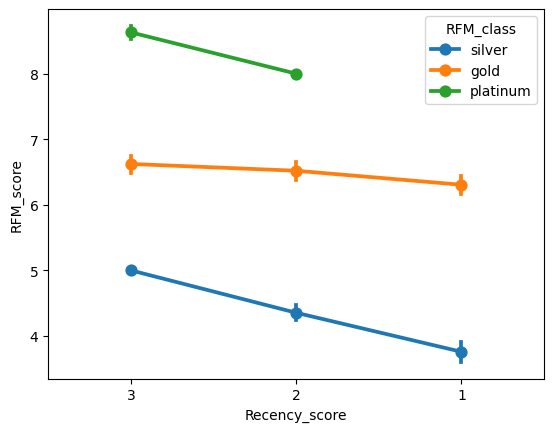

In [50]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# axs[0].set_title('Recency Histogram')
# axs[0].hist(cust_rfm['Recency'])

# axs[1].set_title('Frequency Histogram')
# axs[1].hist(cust_rfm['Frequency'])

# axs[2].set_title('Monetary Histogram')
# axs[2].hist(cust_rfm['Monetary'])

# plt.tight_layout()
# plt.show()

sns.pointplot(data= cust_rfm, x= 'Recency_score', y= 'RFM_score', hue= 'RFM_class')

<Axes: xlabel='Frequency_score', ylabel='RFM_score'>

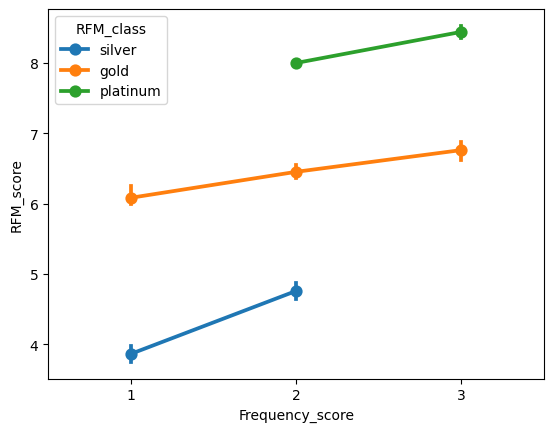

In [51]:
sns.pointplot(data= cust_rfm, x= 'Frequency_score', y= 'RFM_score', hue= 'RFM_class')

<Axes: xlabel='Monetary_score', ylabel='RFM_score'>

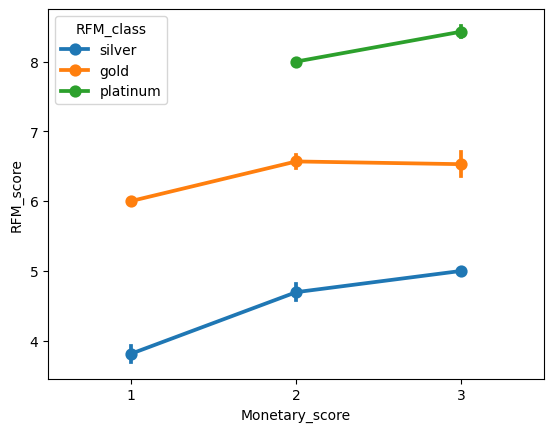

In [52]:
sns.pointplot(data= cust_rfm, x= 'Monetary_score', y= 'RFM_score', hue= 'RFM_class')

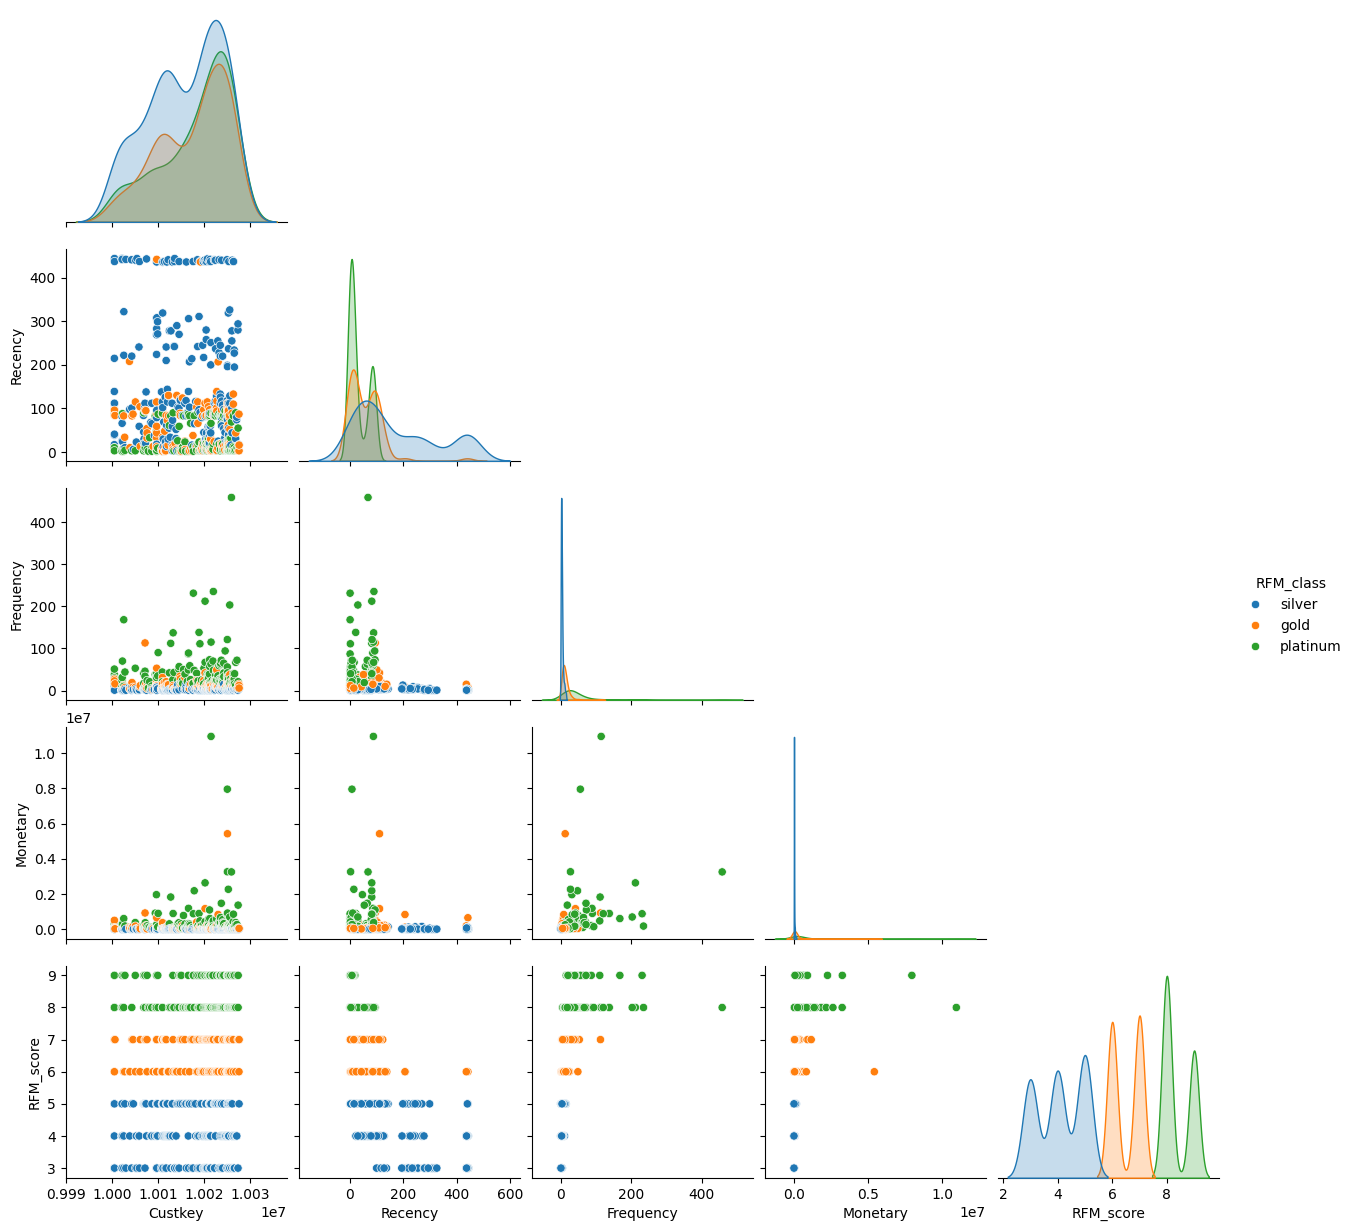

In [53]:
sns.pairplot(cust_rfm, hue= 'RFM_class', corner= True)